In [2]:
##*******Telco Customer Churn-ML Programming*******##

In [3]:
#Information about the dataset:

#1-Customers who left last month: Given in the Churn dataset
#2-Services applicable to each customer
#3- Customer account information and details
#4- Demographic information of customers !!!

#While we are building this model, we will give the customer information to the model and let the model predict whether the customers have unsubscribed.

#First of all, let's fully understand the information contained in the columns.
#1-customerID: It is the number that is unique to each customer. It does not give us any information about whether to leave or not!!!
#2-gender: we can look at gender data
#3-SeniorCitizen: information was given about the old age status of the customer (1,0)
#4-Partner: Information has been given about whether the customer lives with someone (yes, no)
#5-Dependents: The dependents of the customer are mentioned (Yes, No)
#6-tenure : is the length of commitment!!
#7-Phone Service: Information about whether the customer receives phone service (Yes, No)
#8-MultipLines: Does the customer have more than one line or not (Yes, No, No Telephone service)
#9-InternetService: provides information about the customer's internet provider
#10-OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service),
#11-DeviceProtection : whether the customer has device protection
#12-TechSupport: Whether the customer has technical support (Yes, No, no Internet service),
#13-StreamingTV: Whether the customer has a broadcast TV (Yes, No, no Internet service),
#14-StreamingMovies : Whether the customer is streaming movies (Yes, No, no internet service),
#15-Contract: Customer's contract period (Month to month, One
#16-PaperlessBilling: Whether the customer has a paperless invoice (Yes, No),
#17-PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic)),
#18-MonthlyCharges: The monthly amount collected from the customer,
#19-TotalCharges: The total amount collected from the customer,
#20-Churn : Whether the customer has left (Yes or No).

In [4]:
import numpy as np 
import pandas as pd 
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')# Used to ignore or suppress warning messages in Python.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer # we convert categoric data to one_hot encoding!!!
from sklearn.linear_model import LogisticRegression 

In [5]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head(7).T

,0,1,2,3,4,5,6
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK
gender,Female,Male,Male,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes
tenure,1,34,2,45,2,8,22
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No


In [7]:
# now let's examine our data set, is there any missing data or not?

<AxesSubplot:>

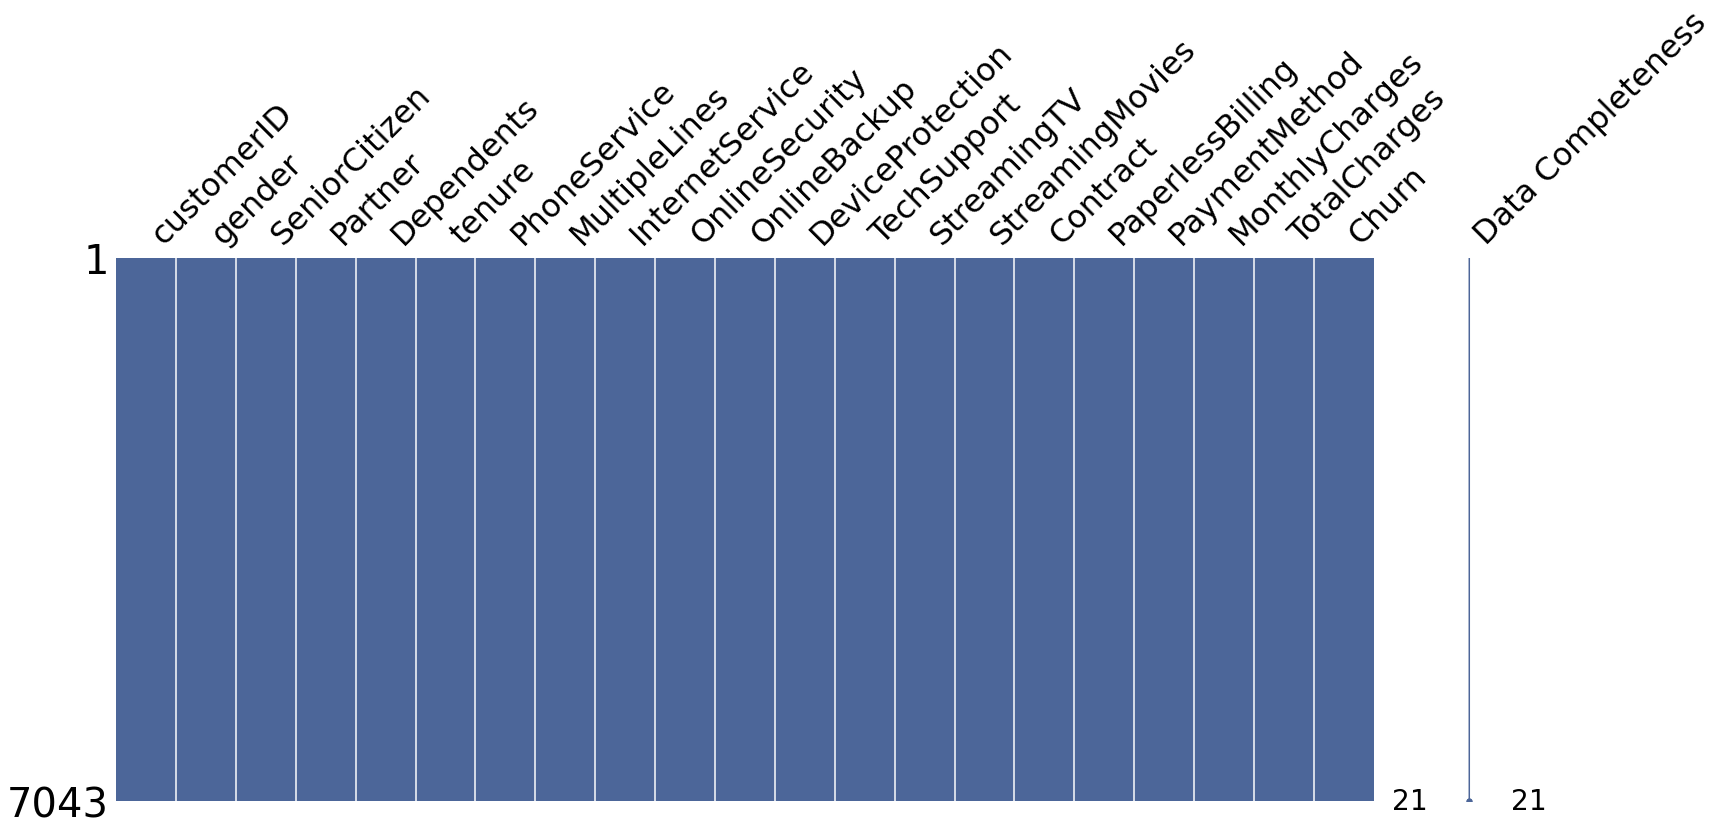

In [8]:
missingno.matrix(df,color=(0.3, 0.4, 0.6),fontsize=32,labels=True)
# as you can see there is no missing data in the data set !!!

In [9]:
# now let's check the missing data the other way 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
# as you can see there is no missing data
# now let's examine it in detail
df.describe().T
# gives information about numeric data

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
df.shape

(7043, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
# Since SeniorCitizien consists of 1-0s, we do not interfere with the analysis.
# Let's fix this in object type even though TotalCharges is numeric
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors="coerce")
# with this code, we convert it to numeric type and with the errors value, when we encounter something unknown, we assign a NaN value


In [16]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df.TotalCharges.fillna(df['TotalCharges'].mean(),inplace=True)

In [18]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

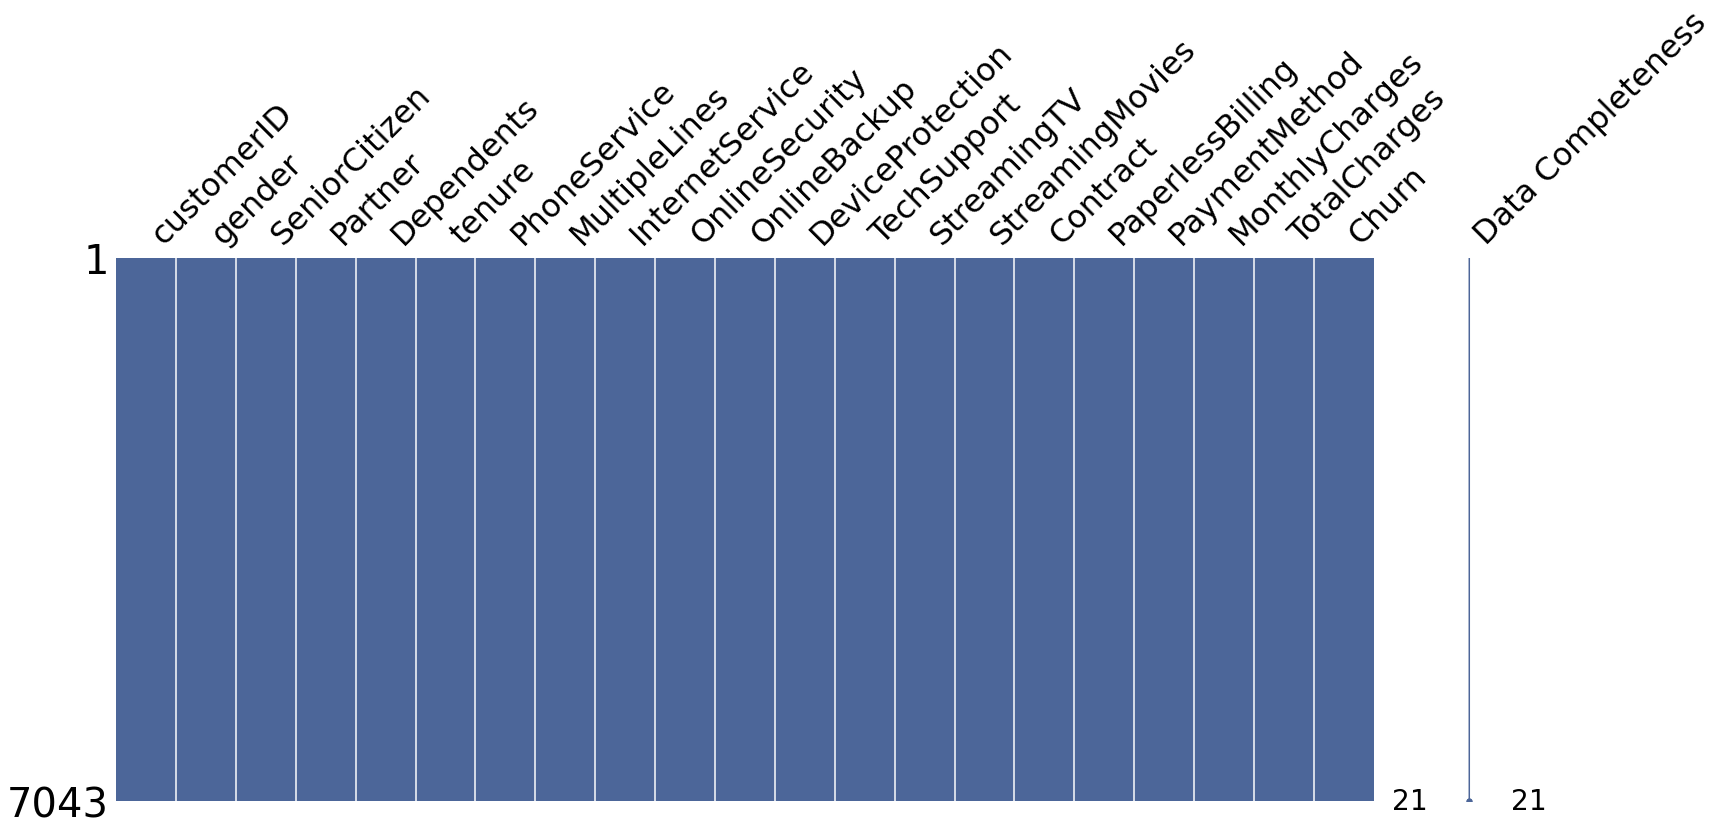

In [20]:
missingno.matrix(df,color=(0.3, 0.4, 0.6),fontsize=32,labels=True)

In [21]:
# now let's compare the data in the columns to each other
  # we said make an underscore if there is a space
df.columns=df.columns.str.lower().str.replace(" ","_") 


In [22]:
str_col=list(df.dtypes[df.dtypes=="object"].index)

In [23]:
str_col

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [24]:
for col in str_col:
    df[col]=df[col].str.lower().str.replace(" ","_")

In [25]:
df.head(7)
# As you can see, str values have changed and _ has entered the spaces.

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
5,9305-cdskc,female,0,no,no,8,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,99.65,820.50,yes
6,1452-kiovk,male,0,no,yes,22,yes,yes,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,credit_card_(automatic),89.10,1949.40,no


In [26]:
# our target variable is churn because we are trying to predict it
# other columns were attribute columns

In [27]:
df.churn.head(7)
# yes: means the customer service has left
# no : means that the customer service has not left

0     no
1     no
2    yes
3     no
4    yes
5    yes
6     no
Name: churn, dtype: object

In [28]:
df.churn=(df.churn=="yes").astype(int)

In [29]:
df.churn.head(7)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
Name: churn, dtype: int32

<AxesSubplot:xlabel='monthlycharges', ylabel='totalcharges'>

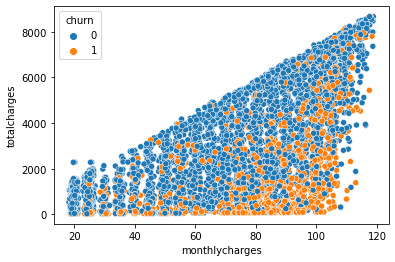

In [30]:
sns.scatterplot(data=df,x='monthlycharges', y='totalcharges', hue='churn')
# we examine the movements of the data according to the payment status

<AxesSubplot:xlabel='tenure', ylabel='Density'>

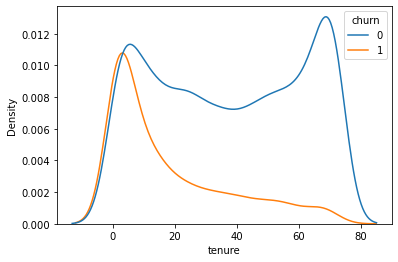

In [31]:
sns.kdeplot(data=df, x='tenure', hue='churn') 
# dropout decreases as tenure length increases

<AxesSubplot:xlabel='gender', ylabel='count'>

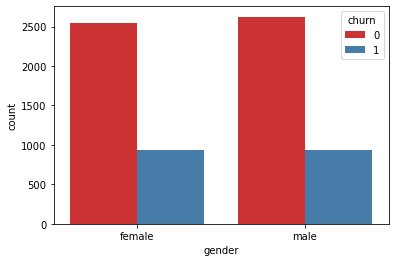

In [32]:
sns.countplot(data = df, x = 'gender', hue = 'churn', palette = 'Set1')

<AxesSubplot:xlabel='partner', ylabel='count'>

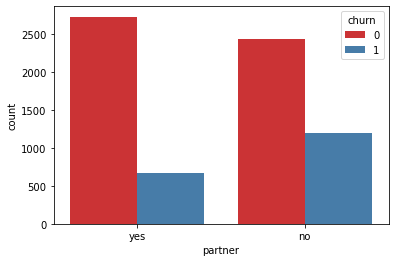

In [33]:
sns.countplot(data = df, x = 'partner', hue = 'churn', palette = 'Set1')

<AxesSubplot:xlabel='phoneservice', ylabel='count'>

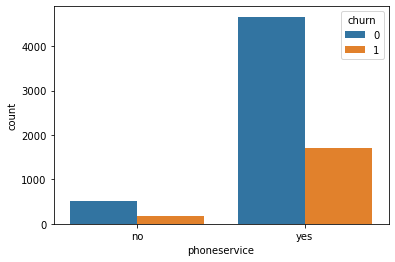

In [34]:
sns.countplot(x='phoneservice',hue='churn',data=df)

<AxesSubplot:xlabel='internetservice', ylabel='count'>

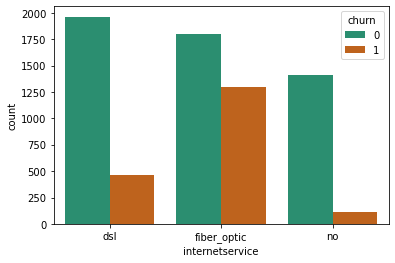

In [35]:
sns.countplot(x='internetservice',hue='churn',data=df,palette='Dark2')

<AxesSubplot:xlabel='techsupport', ylabel='count'>

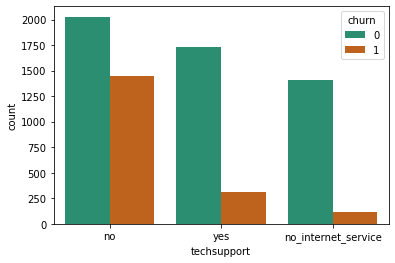

In [36]:
sns.countplot(x='techsupport',hue='churn',data=df,palette='Dark2')

In [37]:
df_train_full,df_test=train_test_split(df,random_state=42)

In [38]:
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=42)
# df_train_full edits dataset here too !!

In [39]:
y_train=df_train.churn.values

In [40]:
y_val=df_val.churn.values

In [41]:
del df_train["churn"]
del df_val["churn"] 
# so we have separated target variable and test variable !!!

In [42]:
df_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 1773 to 5019
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        3961 non-null   object 
 1   gender            3961 non-null   object 
 2   seniorcitizen     3961 non-null   int64  
 3   partner           3961 non-null   object 
 4   dependents        3961 non-null   object 
 5   tenure            3961 non-null   int64  
 6   phoneservice      3961 non-null   object 
 7   multiplelines     3961 non-null   object 
 8   internetservice   3961 non-null   object 
 9   onlinesecurity    3961 non-null   object 
 10  onlinebackup      3961 non-null   object 
 11  deviceprotection  3961 non-null   object 
 12  techsupport       3961 non-null   object 
 13  streamingtv       3961 non-null   object 
 14  streamingmovies   3961 non-null   object 
 15  contract          3961 non-null   object 
 16  paperlessbilling  3961 non-null   objec

In [44]:
numerical_cols=["seniorcitizen","tenure","monthlycharges","totalcharges"]

In [45]:
categorical_cols=["gender","partner","dependents","phoneservice","multiplelines",
                 "internetservice","onlinesecurity","onlinebackup","deviceprotection",
                 "techsupport","streamingtv","streamingmovies","contract","paperlessbilling",
                 "paymentmethod"]

In [46]:
train_dict=df_train[categorical_cols+numerical_cols].to_dict(orient="records")

In [47]:
train_dict[1]

{'gender': 'female',
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'seniorcitizen': 0,
 'tenure': 18,
 'monthlycharges': 20.25,
 'totalcharges': 401.95}

In [48]:
dv=DictVectorizer(sparse=False)

In [49]:
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [50]:
x_train=dv.transform(train_dict)

In [51]:
x_train[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.93500e+01, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 6.80000e+01, 1.29265e+03])

In [52]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [53]:
feature_names=dv.get_feature_names_out()
print(feature_names)

['contract=month-to-month' 'contract=one_year' 'contract=two_year'
 'dependents=no' 'dependents=yes' 'deviceprotection=no'
 'deviceprotection=no_internet_service' 'deviceprotection=yes'
 'gender=female' 'gender=male' 'internetservice=dsl'
 'internetservice=fiber_optic' 'internetservice=no' 'monthlycharges'
 'multiplelines=no' 'multiplelines=no_phone_service' 'multiplelines=yes'
 'onlinebackup=no' 'onlinebackup=no_internet_service' 'onlinebackup=yes'
 'onlinesecurity=no' 'onlinesecurity=no_internet_service'
 'onlinesecurity=yes' 'paperlessbilling=no' 'paperlessbilling=yes'
 'partner=no' 'partner=yes' 'paymentmethod=bank_transfer_(automatic)'
 'paymentmethod=credit_card_(automatic)' 'paymentmethod=electronic_check'
 'paymentmethod=mailed_check' 'phoneservice=no' 'phoneservice=yes'
 'seniorcitizen' 'streamingmovies=no'
 'streamingmovies=no_internet_service' 'streamingmovies=yes'
 'streamingtv=no' 'streamingtv=no_internet_service' 'streamingtv=yes'
 'techsupport=no' 'techsupport=no_interne

In [54]:
model=LogisticRegression(solver="liblinear",random_state=42)

In [55]:
model.fit(x_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [56]:
#we use validation data to measure the performance of the model!!!

In [57]:
val_dict=df_val[categorical_cols+numerical_cols].to_dict(orient="records")

In [58]:
x_val=dv.transform(val_dict)

In [59]:
y_pred=model.predict_proba(x_val)

In [60]:
y_pred[:5]
# 1st customer has a probability of 0 0.77 probability of a 1 0.22

array([[0.77498196, 0.22501804],
       [0.83137285, 0.16862715],
       [0.98499409, 0.01500591],
       [0.94720841, 0.05279159],
       [0.72526733, 0.27473267]])

In [61]:
model.score(x_val,y_val)

0.7993943981831946

In [62]:
model.score(x_train,y_train)

0.8043423377934865

In [63]:
model.intercept_[0]

-0.14300597184724106

In [64]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.568,
 'contract=one_year': -0.097,
 'contract=two_year': -0.614,
 'dependents=no': 0.002,
 'dependents=yes': -0.145,
 'deviceprotection=no': 0.005,
 'deviceprotection=no_internet_service': -0.123,
 'deviceprotection=yes': -0.025,
 'gender=female': -0.063,
 'gender=male': -0.08,
 'internetservice=dsl': -0.343,
 'internetservice=fiber_optic': 0.323,
 'internetservice=no': -0.123,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.225,
 'multiplelines=no_phone_service': 0.109,
 'multiplelines=yes': -0.028,
 'onlinebackup=no': 0.064,
 'onlinebackup=no_internet_service': -0.123,
 'onlinebackup=yes': -0.083,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.123,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.208,
 'paperlessbilling=yes': 0.065,
 'partner=no': -0.074,
 'partner=yes': -0.069,
 'paymentmethod=bank_transfer_(automatic)': -0.012,
 'paymentmethod=credit_card_(automatic)': -0.259,
 'paymentmethod=electronic_check': 0.233,

In [65]:
customer = {
    'customerid' : '8879-zkjof',
    'gender' : 'male',
    'seniorcitizen' : 1,
    'partner' : 'no',
    'dependents' : 'no',
    'tenure' : 41,
    'phoneservice' : 'yes',
    'multiplelines' : 'no',
    'internetservice' : 'dsl',
    'onlinesecurity' : 'yes',
    'onlinebackup' : 'no',
    'deviceprotection' : 'yes',
    'techsupport' : 'yes',
    'streamingtv' : 'yes',
    'streamingmovies' : 'yes',
    'contract' : 'one_year',
    'paperlessbilling' : 'yes',
    'paymentmethod' : 'bank_transfer_(automatic)',
    'monthlycharges' : 79.85,
    'totalcharges' : 2990.75,
}

In [66]:
x_new=dv.transform([customer])

In [67]:
model.predict_proba(x_new)

array([[0.92690854, 0.07309146]])